In [ ]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load the Iris Dataset
iris_data = pd.read_csv("Iris.csv")

**Exploring the datset using head, info and describe**

In [ ]:
# Step 3: Explore the Dataset by displaying first few rows of the dataset
print("Preview of the Iris dataset:")
print(iris_data.head())

Preview of the Iris dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
iris_data = iris_data.drop('Id', axis=1)

In [ ]:
print("\nDataset information:")
print(iris_data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print("\nSummary statistics of the dataset:")
print(iris_data.describe()) # Get summary statistics of numerical columns


Summary statistics of the dataset:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [ ]:
# Step 5: Explore Species-wise Statistics
species_stats = iris_data.groupby('Species').describe()
print("\nSpecies-wise Statistics:")
print(species_stats)


Species-wise Statistics:
                SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                      

**Checking for Missing Values**

In [ ]:
missing_values = iris_data.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values)  # Check for missing values in each column


Missing values in the dataset:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


**Visualize Key Statistics and Distributions**

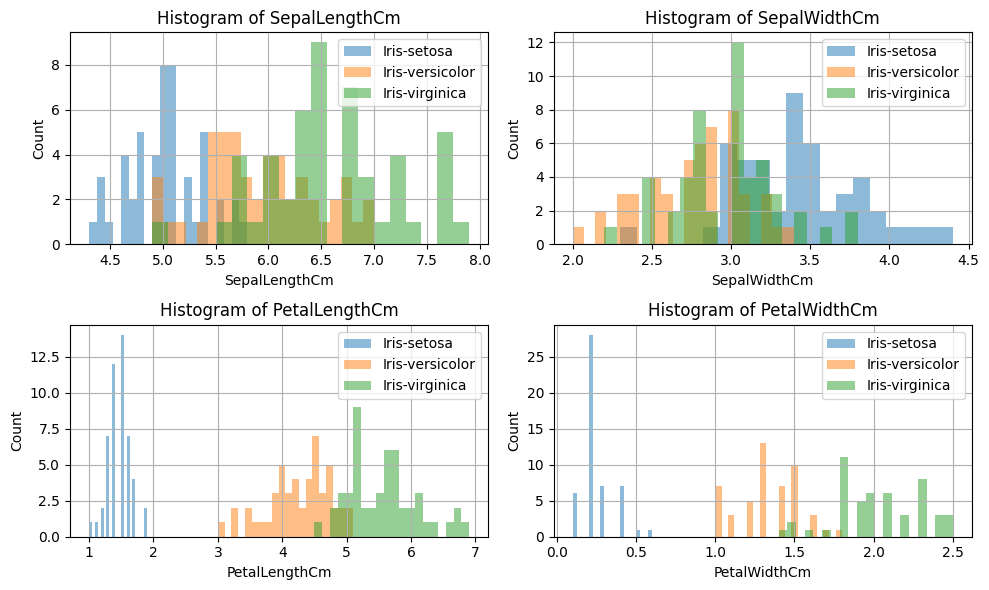

In [ ]:
# histograms for each feature by species
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris_data.columns[:-1]):
    plt.subplot(2, 2, i+1)
    for species, group in iris_data.groupby('Species'):
        group[feature].hist(alpha=0.5, label=species, bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

<Axes: ylabel='Count'>

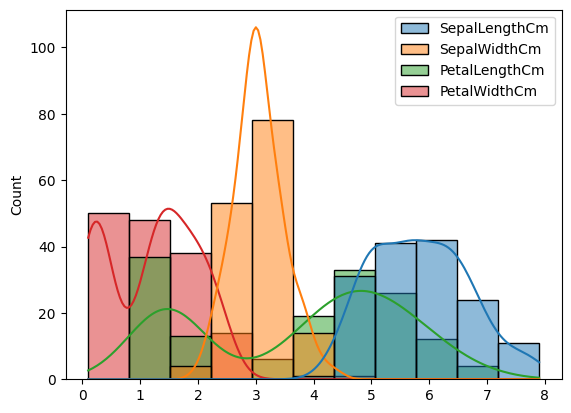

In [ ]:
sns.histplot(iris_data, kde=True, color='skyblue', edgecolor='black')

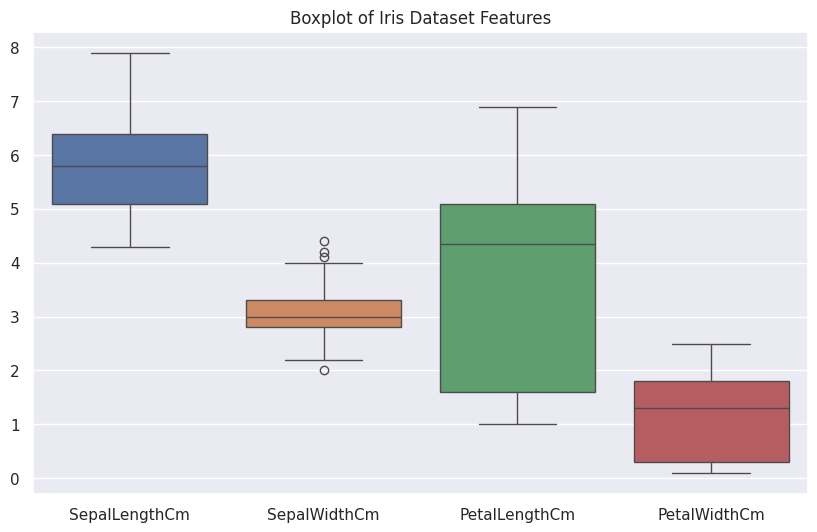

In [ ]:
# Plot boxplots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_data)
plt.title('Boxplot of Iris Dataset Features')
plt.show()

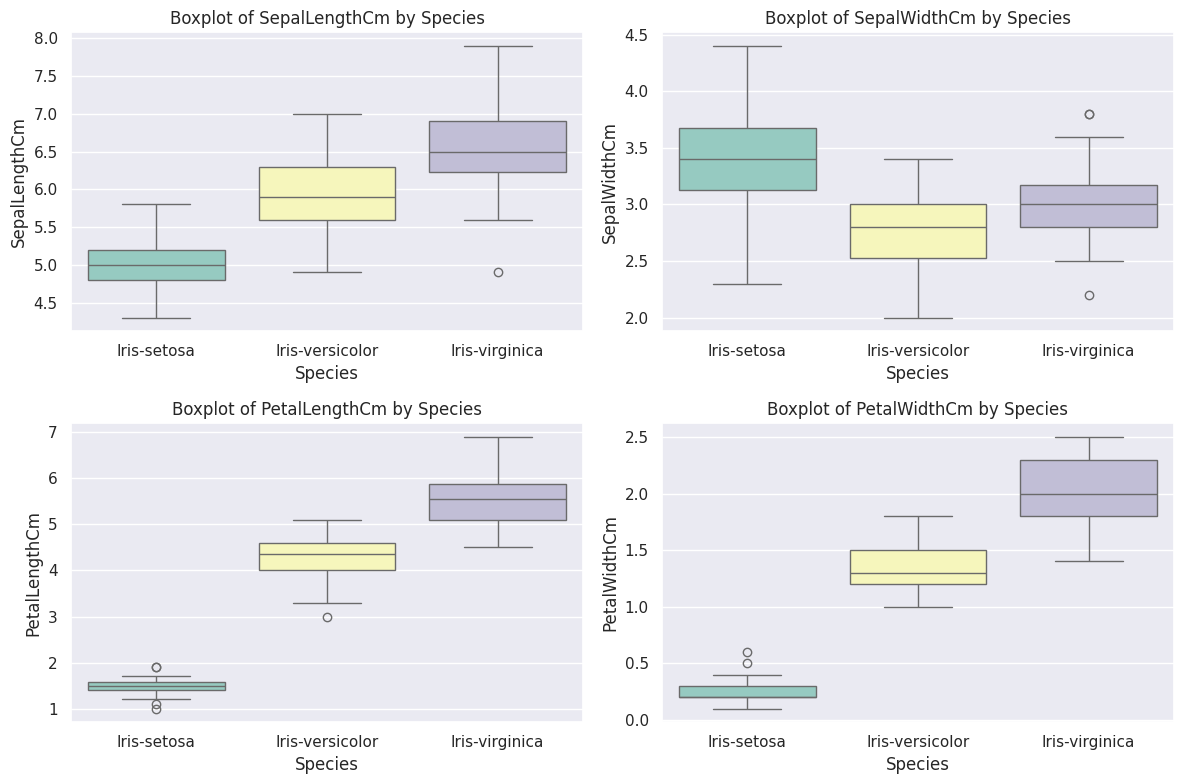

In [ ]:
# Plot boxplots to identify outliers by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_data.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=feature, data=iris_data, hue='Species', palette="Set3", legend=False)
    plt.title(f'Boxplot of {feature} by Species')

plt.tight_layout()
plt.show()

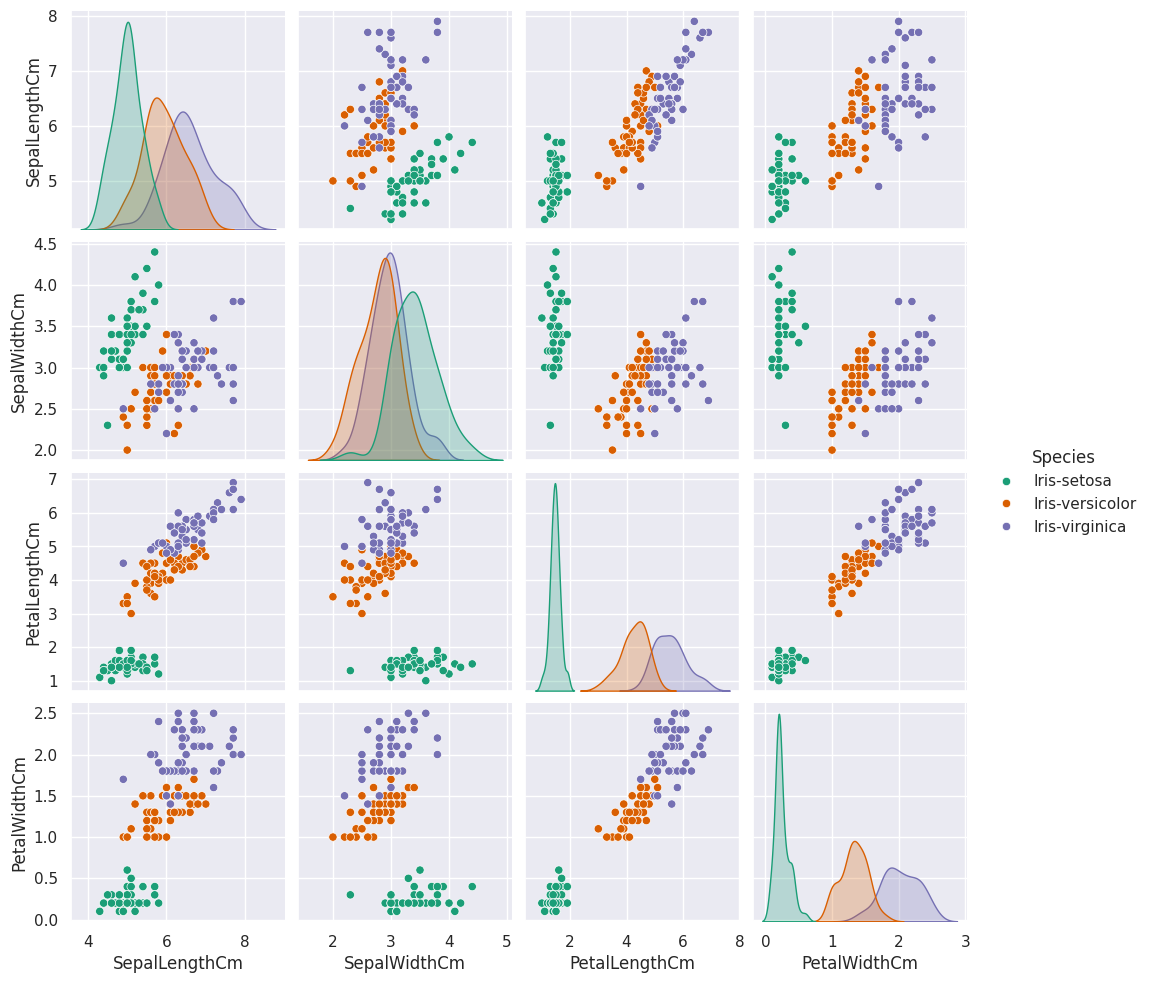

In [ ]:
# Create pair plots to visualize relationships between different features
sns.pairplot(iris_data, hue='Species', palette='Dark2')
plt.show()

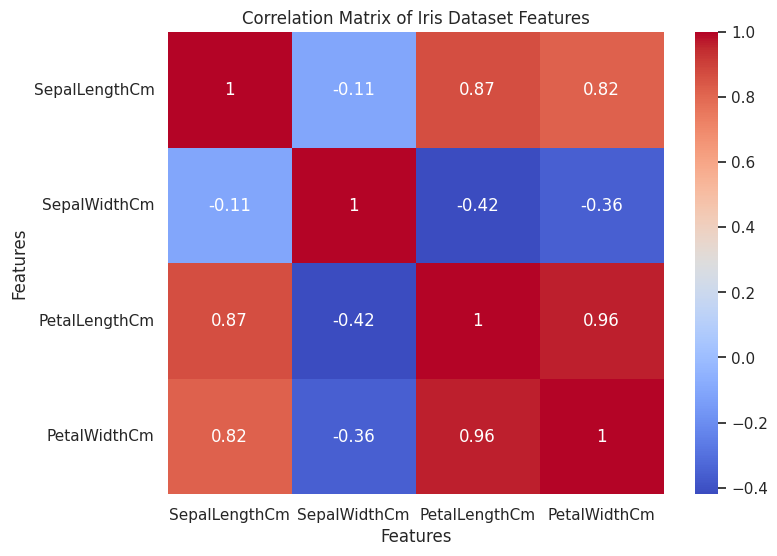

In [ ]:
# Drop the 'Species' column and using heatmap to visualize correlations between features
numeric_data = iris_data.drop('Species', axis=1)

# Calculating the correlation matrix
corr_matrix = numeric_data.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Adding title and labels
plt.title('Correlation Matrix of Iris Dataset Features')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()